In [1]:
import timm
import torch
from torchsummary import summary

In [2]:
import torchvision
from torchvision import transforms
from torchvision.models.feature_extraction import create_feature_extractor

In [3]:
from ecg_dataset import EcgImage

In [4]:
data_transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
])

In [5]:
dataset = EcgImage(
    root = 'ecg_id_img/train',
    transform=data_transform,
    triplet_batch=(4, 4)
)
tst_input = dataset[0][0].unsqueeze(0).to('cuda')

root: ecg_id_img/train


In [7]:
model_features = timm.create_model('regnety_002',
                                   features_only=True,
                                   num_classes=90,
                                   pretrained=True,
                                   out_indices=[1, 2, 3, 4]).to('cuda')

In [13]:
multi_features = model_features(tst_input)
processed = []

In [14]:
for i, feat in enumerate(multi_features):
    feature_map = feat.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(56, 56)
(28, 28)
(14, 14)
(7, 7)


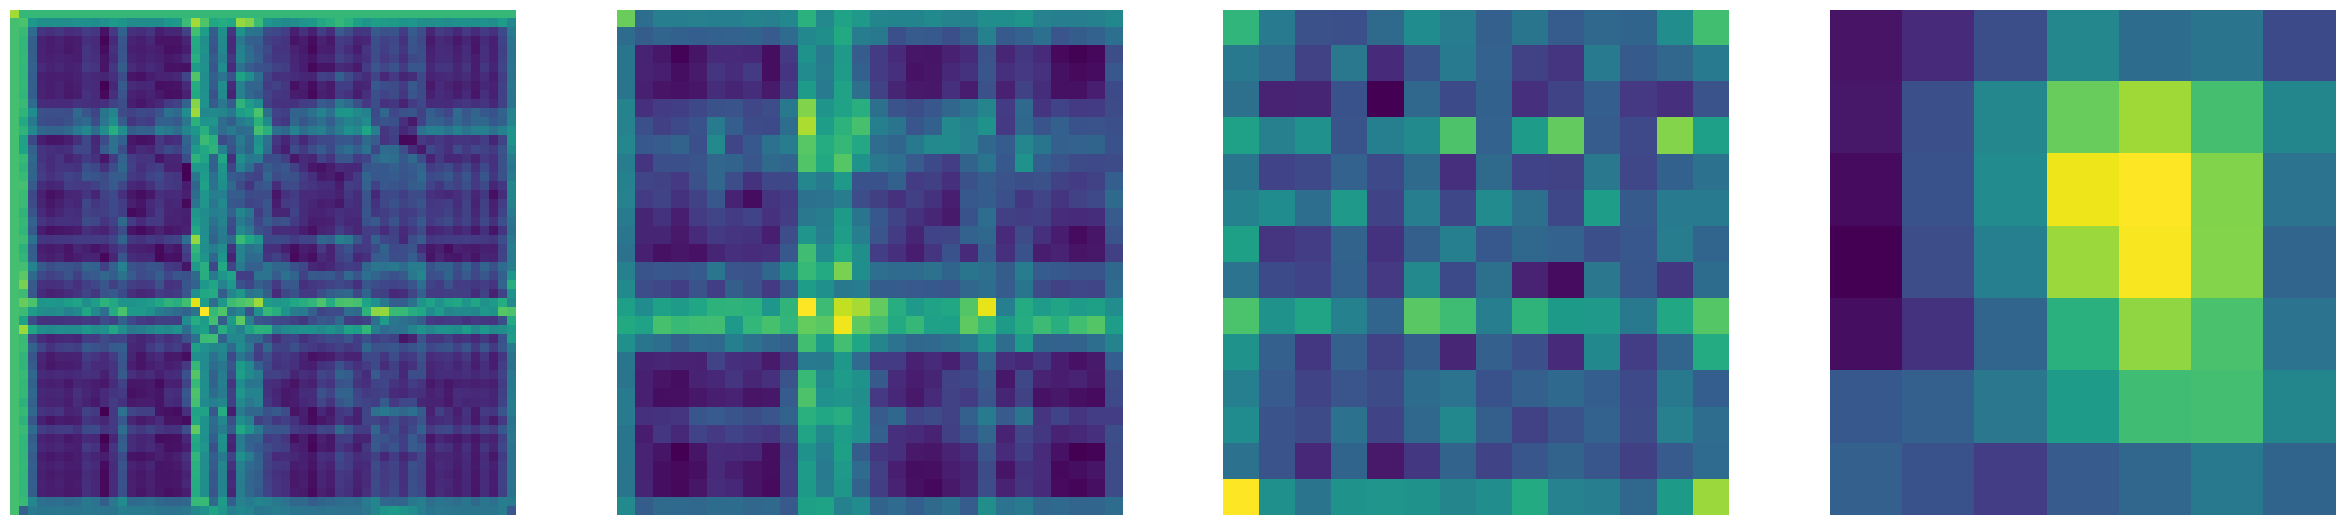

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 50))

for i in range(len(processed)):   # len(processed) = 17
    a = fig.add_subplot(5, 4, i+1)
    img_plot = plt.imshow(processed[i])
    a.axis("off")